**Data Cleanning**

In [22]:
#Import all relevant libraries
import pandas as pd
import numpy as np

In [23]:
#read in data into pandas dataframe
data = pd.read_csv('school1.csv')
data.head()

,student_id,school,term,academicriskscore,engagementriskscore,financialriskscore,beliefriskscore,overallriskscore,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,...,engagement,financial,wellness,response_created,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,year,returnedfall2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,1.0,fall 2018,2.0,12.0,4.0,0.0,18.0,Because it is close to work/home,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,spring 2019,2.0,12.0,4.0,0.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Drop variables
variables_to_drop = ['academicriskscore', 'engagementriskscore', 'financialriskscore', 'beliefriskscore',
                     'overallriskscore', 'wellnessriskscore', 'id', 'ethnic_group_tr', 
                     'residency', 'citizenship', 'um_acad_prog1', 'um_acad_plan1', 'actcomposite', 
                     'hispanic', 'nonresalien', 'americanindian', 'asian', 'black', 'pacific', 'white',
                     'actionrsn', 'advisor', 'sport', 'eligterm', 'overallrisk', 'academic', 'engagement',
                     'financial', 'wellness', 'response_created', 'year', 'returnedfall2019', 'f18_dropout', 
                     's19_dropout', 'returnedfall2019']


data = data.drop(variables_to_drop, 1)

In [25]:
#Drop students with no survey responses
data = data.dropna(subset=['doyouliveoncampus'])
data.shape[0]

794

In [26]:
#check if we have any duplicated instance
duplicateRowsDF = data[data.duplicated(['student_id', 'term', 'school'])]

assert(duplicateRowsDF.shape[0] == 0)

In [27]:
#check how many dropouts we have and replace missing values with 0
data['dropout'] = data['dropout'].fillna(0)
data['dropout'].value_counts()

0.0    650
1.0    144
Name: dropout, dtype: int64

In [28]:
#Check if we have dropouts for each school
data[['school', 'dropout']].groupby(['school']).agg(['mean', 'std', 'count'])

dropout                
           mean       std count
school                         
1.0     0.18136  0.385559   794

In [29]:
#Check if we have dropouts for each term
data[['term', 'dropout']].groupby(['term']).agg(['mean', 'std', 'count'])

dropout                
                mean       std count
term                                
fall 2018    0.18136  0.385803   397
spring 2019  0.18136  0.385803   397

In [30]:
#Create two columns for semseter and a year and drop original term variable and convert the semester to float
data[['Semester','Year']] = data.term.str.split(expand=True) 
data = data.drop('term',1)
data['Semester'] = (data['Semester'] == 'spring').astype(float)
data.head()

,student_id,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,pleasespecifyyourraceethnicity,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,howlikelyareyoutorecommendyourun,iaminterestedinthecoursesthatiam,...,whichofthefollowingbestdescribes,doyouhavechildren,areyouanathlete,dropout,wheniwasinhighschool,ifihaveanissue,myparentsrelativessupportmefina,istruggletopayfortextbooks,Semester,Year
1,4.0,1.0,Because it is close to work/home,No,White,No,No,Yes,10.0,Agree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018
3,4.0,1.0,NaN,NaN,NaN,No,No,Yes,10.0,Agree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,2019
5,10.0,1.0,Other,Yes,Two or more races,Yes,No,No,7.0,Somewhat Agree,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,2018
7,10.0,1.0,NaN,NaN,NaN,Yes,No,Yes,6.0,Somewhat agree,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2019
9,13.0,1.0,Because it is close to work/home,No,Black or African American,Yes,No,Yes,7.0,Strongly Agree,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2018


In [31]:
#Combine identical Questions
data.howlikelyareyoutorecommendyourun = np.where(data.howlikelyareyoutorecommendyourun == '.', np.NaN, data.howlikelyareyoutorecommendyourun)
data['howlikelyareyoutorecommendyourun'] = data['howlikelyareyoutorecommendyourun'].astype(float)
data.loc[data['howlikelyareyoutorecommendyoursc'] == 0, 'howlikelyareyoutorecommendyoursc'] = 1

data.howlikelyareyoutorecommendyoursc = np.where(data.howlikelyareyoutorecommendyoursc.isnull(), data.howlikelyareyoutorecommendyourun, data.howlikelyareyoutorecommendyoursc)
data = data.drop('howlikelyareyoutorecommendyourun',1)

data.iamscaredoffailingoneormoreofmyc = np.where(data.iamscaredoffailingoneormoreofmyc.isnull(), data.iamscaredoffailingmorethanoneofm, data.iamscaredoffailingoneormoreofmyc)
data = data.drop('iamscaredoffailingmorethanoneofm',1)

data.wheniwasinhighschoolialwaysknewi = np.where(data.wheniwasinhighschoolialwaysknewi.isnull(), data.wheniwasinhighschool, data.wheniwasinhighschoolialwaysknewi)
data =data.drop('wheniwasinhighschool', 1)
data.ifihaveanissueihavesomeonetoreac = np.where(data.ifihaveanissueihavesomeonetoreac.isnull(), data.ifihaveanissue, data.ifihaveanissueihavesomeonetoreac)
data = data.drop('ifihaveanissue',1)
data.myparentsrelativessupportmefinan = np.where(data.myparentsrelativessupportmefinan.isnull(), data.myparentsrelativessupportmefina ,data.myparentsrelativessupportmefinan)
data = data.drop('myparentsrelativessupportmefina',1)
data.istruggletopayfortextbooksrentut = np.where(data.istruggletopayfortextbooksrentut.isnull(),data.istruggletopayfortextbooks , data.istruggletopayfortextbooksrentut)
data = data.drop('istruggletopayfortextbooks',1)
data.mysociallifegetsinthewayofmedoin = np.where(data.mysociallifegetsinthewayofmedoin.isnull(),data.partyinggetsinthewayofmedoingwel , data.mysociallifegetsinthewayofmedoin)
data = data.drop('partyinggetsinthewayofmedoingwel',1)


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [32]:
#Create a list of lakert scale and one_hot variables
lakirt = ['iaminterestedinthecoursesthatiam', 'mycourseloadistoochallenging', 'iamscaredoffailingoneormoreofmyc',
          'thecoursesthatiamtakingwillhelpm', 'iamconfidentthatiwillgraduateint', 'myparentsrelativessupportmefinan',
          'istruggletopayfortextbooksrentut', 'iworryalotaboutpayingforschool', 'iwouldbenefitfromhelpmanagingmyf',
          'iamconsideringtakingabreakfromsc', 'ifeellikeifitintomyschool', 'ifihaveanissueihavesomeonetoreac',
          'ioftenattendeventsorganizedbyacl', 'wheniwasinhighschoolialwaysknewi',
          'ibelievethatacollegedegreeisvalu', 'iwasexcitedtoseemyfriendswhenica', 'mysociallifegetsinthewayofmedoin',
          'iexerciseatleasttwiceaweek', 'igetmorethan7hoursofsleeponmostn', 'ithinkthatiwillbesuccessfulatthi'
          ]

one_hot = ['whydidyouchoosethisschool', 'areyouthefirstpersoninyourfamily', 'pleasespecifyyourraceethnicity', 
           'doyouliveoncampus', 'doyouhaveanymajorfamilycommitmen', 'haveyoumetwithyouradvisororhavea', 
           'withwhatgenderdoyouidentify', 'didyoufailoneormoreofyourcourses', 'willyoubeworking20hoursaweekormo', 
           'whichofthefollowingbestdescribes', 'doyouhavechildren', 'areyouanathlete', 'iampayingforcollegeoutofpocketbu'    
          ] 

In [33]:
#fill gender and race by student id and school
data['pleasespecifyyourraceethnicity'] = data.sort_values(['student_id', 'pleasespecifyyourraceethnicity']).groupby(['student_id'])['pleasespecifyyourraceethnicity'].ffill()

In [34]:
data['withwhatgenderdoyouidentify'] = data.sort_values(['student_id', 'withwhatgenderdoyouidentify']).groupby(['student_id'])['withwhatgenderdoyouidentify'].ffill()

In [35]:
#combine similar response
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It has a good academic reputation', 'Because of its academic reputation', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'It is close to work/home', 'Because it is close to work/home', data['whydidyouchoosethisschool'])
data['whydidyouchoosethisschool'] = np.where(data['whydidyouchoosethisschool'] == 'Because the schoolâs classes fit with my work schedule', 'It offers classes that fit my work schedule', data['whydidyouchoosethisschool'])

In [36]:
#Create a flag for missing lakirt variables
for i in lakirt:
    if True in data[i].isnull().values:
        data[i+'_mv'] = (data[i].isnull()).astype(int) 

data.head()

,student_id,school,whydidyouchoosethisschool,areyouthefirstpersoninyourfamily,pleasespecifyyourraceethnicity,doyouliveoncampus,doyouhaveanymajorfamilycommitmen,haveyoumetwithyouradvisororhavea,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,...,doyouhavechildren,areyouanathlete,dropout,Semester,Year,wheniwasinhighschoolialwaysknewi_mv,iwasexcitedtoseemyfriendswhenica_mv,iexerciseatleasttwiceaweek_mv,igetmorethan7hoursofsleeponmostn_mv,ithinkthatiwillbesuccessfulatthi_mv
1,4.0,1.0,Because it is close to work/home,No,White,No,No,Yes,Agree,Disagree,...,NaN,NaN,0.0,0.0,2018,0,1,1,1,1
3,4.0,1.0,NaN,NaN,White,No,No,Yes,Agree,Somewhat agree,...,NaN,NaN,0.0,1.0,2019,1,0,1,1,1
5,10.0,1.0,Other,Yes,Two or more races,Yes,No,No,Somewhat Agree,Disagree,...,NaN,NaN,1.0,0.0,2018,0,1,1,1,1
7,10.0,1.0,NaN,NaN,Two or more races,Yes,No,Yes,Somewhat agree,Disagree,...,NaN,NaN,1.0,1.0,2019,1,0,1,1,1
9,13.0,1.0,Because it is close to work/home,No,Black or African American,Yes,No,Yes,Strongly Agree,Somewhat Agree,...,NaN,NaN,0.0,0.0,2018,0,1,1,1,1


In [37]:
for column in lakirt:
    data[column].fillna(data[column].mode()[0], inplace=True)

IndexError: index out of bounds

In [38]:
#capitalize lakirt variables to treat Strongly disagree and Strongly Disagree as same
data[lakirt] = data[lakirt].applymap(lambda x : x.capitalize())
data[lakirt]

AttributeError: ("'float' object has no attribute 'capitalize'", 'occurred at index iexerciseatleasttwiceaweek')

In [18]:
if True in data['balancingworkandschoolistoostres'].isnull().values:
    data['balancingworkandschoolistoostres'+'_mv'] = (data['balancingworkandschoolistoostres'].isnull()).astype(int)

In [19]:
#seperately encode balncing work and schoo is stressful variable and generate work variable based on responses
data['balancingworkandschoolistoostres'].fillna(data['balancingworkandschoolistoostres'].mode()[0], inplace=True)
data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(lambda x : x.capitalize())

In [20]:
if 'Not applicable (i donât work)' in data['balancingworkandschoolistoostres'].values:
    data['not_work'] = (data['balancingworkandschoolistoostres'] == 'Not applicable (i donât work)').astype(int) 

In [21]:
data['work'] = (data['balancingworkandschoolistoostres'+'_mv'] == 0) & (data['not_work'] == 0)

In [22]:
data['work'] = data['work'].astype(int)

In [23]:
data['work'].value_counts()

0    1749
1    1089
Name: work, dtype: int64

In [24]:
data['balancingworkandschoolistoostres'].value_counts()

Disagree                           1948
Somewhat agree                      396
Agree                               214
Not applicable (i donât work)     105
Strongly agree                      103
Strongly disagree                    72
Name: balancingworkandschoolistoostres, dtype: int64

In [25]:
ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7, 'Not applicable (i donât work)': 4}

data['balancingworkandschoolistoostres'] = data['balancingworkandschoolistoostres'].map(ord_map)

In [26]:
#encode lakirt variables
gen_ord_map = {'Strongly disagree': 1, 'Disagree': 2, 
               'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7}
for i in data[lakirt]:
    data[i] = data[i].map(gen_ord_map)

In [27]:
#fill missing on_hot variables
data[one_hot] = data[one_hot].fillna('missing')

In [28]:
#data[one_hot] = data[one_hot].astype('category')
data = pd.get_dummies(data, columns = one_hot)

In [29]:
data.head()

,student_id,school,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,...,doyouhavechildren_No,doyouhavechildren_Yes,doyouhavechildren_missing,areyouanathlete_No,areyouanathlete_Yes,areyouanathlete_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing
1,4.0,1,6,2,2,6,7,6,2,2,...,0,0,1,0,0,1,0,0,0,1
2,4.0,1,6,5,1,6,7,6,2,2,...,0,0,1,0,0,1,0,1,0,0
4,7.0,1,6,2,7,7,7,5,2,6,...,1,0,0,1,0,0,0,0,0,1
5,10.0,1,5,2,2,5,7,1,6,7,...,0,0,1,0,0,1,0,0,0,1
6,10.0,1,5,2,6,5,7,1,6,7,...,0,0,1,0,0,1,0,0,1,0


In [30]:
data_columns = list(data)

In [31]:
data_columns

['student_id',
 'school',
 'iaminterestedinthecoursesthatiam',
 'mycourseloadistoochallenging',
 'iamscaredoffailingoneormoreofmyc',
 'thecoursesthatiamtakingwillhelpm',
 'iamconfidentthatiwillgraduateint',
 'myparentsrelativessupportmefinan',
 'istruggletopayfortextbooksrentut',
 'iworryalotaboutpayingforschool',
 'iwouldbenefitfromhelpmanagingmyf',
 'balancingworkandschoolistoostres',
 'iamconsideringtakingabreakfromsc',
 'ifeellikeifitintomyschool',
 'ifihaveanissueihavesomeonetoreac',
 'ioftenattendeventsorganizedbyacl',
 'wheniwasinhighschoolialwaysknewi',
 'ibelievethatacollegedegreeisvalu',
 'iwasexcitedtoseemyfriendswhenica',
 'mysociallifegetsinthewayofmedoin',
 'iexerciseatleasttwiceaweek',
 'igetmorethan7hoursofsleeponmostn',
 'ithinkthatiwillbesuccessfulatthi',
 'howlikelyareyoutorecommendyoursc',
 'dropout',
 'Semester',
 'Year',
 'iwouldbenefitfromhelpmanagingmyf_mv',
 'ioftenattendeventsorganizedbyacl_mv',
 'wheniwasinhighschoolialwaysknewi_mv',
 'iwasexcitedtoseemyfrien

In [32]:
#check that we have no missing values
True in data.isna().values

False

In [33]:
data.to_csv('Data_Clean_Mode.csv',sep=',', index = None)

**Exploratory Analysis**

In [34]:
data.dropout.describe()

count    2838.000000
mean        0.063425
std         0.243769
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: dropout, dtype: float64

In [35]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
student_id,2838.0,1802.466526,998.715395,2.0,939.25,1854.0,2685.25,3431.0
school,2838.0,1.496829,0.686100,1.0,1.00,1.0,2.00,3.0
iaminterestedinthecoursesthatiam,2838.0,5.771318,1.066123,1.0,5.00,6.0,6.00,7.0
mycourseloadistoochallenging,2838.0,3.139535,1.666898,1.0,2.00,2.0,5.00,7.0
iamscaredoffailingoneormoreofmyc,2838.0,3.921424,2.268035,1.0,2.00,5.0,6.00,7.0
thecoursesthatiamtakingwillhelpm,2838.0,5.935166,1.155220,1.0,6.00,6.0,7.00,7.0
iamconfidentthatiwillgraduateint,2838.0,6.563425,0.744876,1.0,6.00,7.0,7.00,7.0
myparentsrelativessupportmefinan,2838.0,5.324877,1.895253,1.0,5.00,6.0,7.00,7.0
istruggletopayfortextbooksrentut,2838.0,3.449260,2.069143,1.0,2.00,2.0,5.00,7.0
iworryalotaboutpayingforschool,2838.0,4.648344,2.102003,1.0,2.00,5.0,6.00,7.0


In [36]:
data[['iamconsideringtakingabreakfromsc', 'dropout']].groupby(['iamconsideringtakingabreakfromsc']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
iamconsideringtakingabreakfromsc                          
1                                 0.028595  0.166737  1189
2                                 0.066822  0.249811  1287
5                                 0.133333  0.340693   225
6                                 0.246753  0.433949    77
7                                 0.183333  0.390205    60

In [37]:
data[['mysociallifegetsinthewayofmedoin', 'dropout']].groupby(['mysociallifegetsinthewayofmedoin']).agg(['mean', 'std', 'count'])

dropout                
                                      mean       std count
mysociallifegetsinthewayofmedoin                          
1                                 0.142857  0.350301   469
2                                 0.035234  0.184414  2157
5                                 0.160305  0.368297   131
6                                 0.204082  0.407206    49
7                                 0.187500  0.396558    32

In [38]:
data[['areyouthefirstpersoninyourfamily_Yes', 'dropout']].groupby(['areyouthefirstpersoninyourfamily_Yes']).agg(['mean', 'std', 'count'])

dropout                
                                          mean       std count
areyouthefirstpersoninyourfamily_Yes                          
0                                     0.065170  0.246880  2317
1                                     0.055662  0.229489   521

In [39]:
data.corr()

,student_id,school,iaminterestedinthecoursesthatiam,mycourseloadistoochallenging,iamscaredoffailingoneormoreofmyc,thecoursesthatiamtakingwillhelpm,iamconfidentthatiwillgraduateint,myparentsrelativessupportmefinan,istruggletopayfortextbooksrentut,iworryalotaboutpayingforschool,...,doyouhavechildren_No,doyouhavechildren_Yes,doyouhavechildren_missing,areyouanathlete_No,areyouanathlete_Yes,areyouanathlete_missing,iampayingforcollegeoutofpocketbu_Agree,iampayingforcollegeoutofpocketbu_Disagree,iampayingforcollegeoutofpocketbu_Not applicable (I already have loans),iampayingforcollegeoutofpocketbu_missing
student_id,1.000000,-0.377577,-0.029823,-0.011077,0.060753,-0.031730,-0.034947,-0.044751,0.054121,0.039956,...,-0.048107,0.032859,0.042384,-0.016968,-0.040154,0.042384,0.022232,0.039769,0.071048,-0.085656
school,-0.377577,1.000000,0.058039,0.070967,-0.093372,0.086461,0.027982,0.115456,-0.129473,-0.079229,...,0.231623,-0.046446,-0.223926,0.114469,0.172189,-0.223926,-0.101817,-0.174674,-0.191807,0.292083
iaminterestedinthecoursesthatiam,-0.029823,0.058039,1.000000,-0.061377,-0.069243,0.465338,0.196926,0.054401,-0.018285,-0.016393,...,-0.035456,0.000117,0.035520,-0.015246,-0.031999,0.035520,-0.005809,0.006780,-0.003293,0.000203
mycourseloadistoochallenging,-0.011077,0.070967,-0.061377,1.000000,0.299297,-0.038134,-0.176611,-0.020156,0.165774,0.131007,...,-0.049272,0.021528,0.045566,-0.061709,0.026791,0.045566,0.035774,0.007637,0.042756,-0.049740
iamscaredoffailingoneormoreofmyc,0.060753,-0.093372,-0.069243,0.299297,1.000000,-0.047955,-0.184933,-0.037110,0.200784,0.236565,...,-0.030631,0.026095,0.026068,-0.009919,-0.025529,0.026068,0.031923,-0.089135,0.031781,0.023207
thecoursesthatiamtakingwillhelpm,-0.031730,0.086461,0.465338,-0.038134,-0.047955,1.000000,0.197716,0.086579,-0.050187,-0.039295,...,0.035855,-0.001995,-0.035587,0.023681,0.018530,-0.035587,-0.016451,-0.015909,-0.024582,0.034530
iamconfidentthatiwillgraduateint,-0.034947,0.027982,0.196926,-0.176611,-0.184933,0.197716,1.000000,0.047320,-0.088362,-0.083904,...,-0.021871,-0.018317,0.025177,-0.019774,-0.008250,0.025177,-0.034281,0.058344,0.000388,-0.024989
myparentsrelativessupportmefinan,-0.044751,0.115456,0.054401,-0.020156,-0.037110,0.086579,0.047320,1.000000,-0.384184,-0.257631,...,0.106360,-0.099963,-0.088856,0.029545,0.093880,-0.088856,-0.051079,-0.003003,-0.058929,0.064317
istruggletopayfortextbooksrentut,0.054121,-0.129473,-0.018285,0.165774,0.200784,-0.050187,-0.088362,-0.384184,1.000000,0.579732,...,-0.199181,0.050719,0.190647,-0.126282,-0.100206,0.190647,0.122675,-0.006789,0.173051,-0.167757
iworryalotaboutpayingforschool,0.039956,-0.079229,-0.016393,0.131007,0.236565,-0.039295,-0.083904,-0.257631,0.579732,1.000000,...,-0.149960,-0.023444,0.154484,-0.099580,-0.085622,0.154484,0.096495,-0.061160,0.103254,-0.071830


In [41]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [42]:
pandas_profiling.ProfileReport(data)

NameError: name 'pandas_profiling' is not defined

In [43]:
import sys
from matplotlib import pyplot as plt
import sklearn.metrics as skm
def plotCorr(dat, lab, h, w):
    '''
    Do a heatmap to visualize the correlation matrix, dropping the label
    '''

    dat = dat.drop(lab, 1)
    #Get correlation and 0 out the diagonal (for plotting purposes)
    c_dat = dat.corr()
    for i in range(c_dat.shape[0]):
        c_dat.iloc[i,i] = 0

    c_mat = c_dat.as_matrix()
    #c_mat = c_mat[:-1, :-1]
    fig, ax = plt.subplots()
    heatmap = plt.pcolor(c_mat, cmap = plt.cm.RdBu)
 
    #Set the tick labels and center them
    ax.set_xticks(np.arange(c_dat.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(c_dat.shape[1]) + 0.5, minor = False)
    ax.set_xticklabels(c_dat.index.values, minor = False, rotation = 45)
    ax.set_yticklabels(c_dat.index.values, minor = False)
    heatmap.axes.set_ylim(0, len(c_dat.index))  
    heatmap.axes.set_xlim(0, len(c_dat.index)) 
    plt.colorbar(heatmap, ax = ax)

    #plt.figure(figsize = (h, w))
    fig = plt.gcf()
    fig.set_size_inches(h, w)

In [44]:
lab = 'dropout'
X = data.drop(lab, 1)
Y = data[[lab]].values
cols = X.columns.values
mis = []

    #Start by getting MI
for c in cols:
    mis.append(skm.normalized_mutual_info_score(Y.ravel(), X[[c]].values.ravel()))

    #Get signs by correlation
corrs = data.corr()[lab]
corrs[corrs.index != lab]
df = pd.DataFrame(zip(mis, cols), columns = ['MI', 'Lab'])
df = pd.merge(df, pd.DataFrame(corrs), how = 'inner', left_on = 'Lab', right_index=True)
df_s = df.sort_values(by = ['MI'], ascending = False)
df_c = df.sort_values(by = ['dropout'], ascending = False)

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 

In [45]:
df_s

,MI,Lab,dropout
0,0.148555,student_id,0.012185
63,0.137462,withwhatgenderdoyouidentify_missing,0.350593
27,0.122203,ioftenattendeventsorganizedbyacl_mv,-0.290714
26,0.122203,iwouldbenefitfromhelpmanagingmyf_mv,-0.290714
31,0.122203,iexerciseatleasttwiceaweek_mv,0.290714
32,0.122203,igetmorethan7hoursofsleeponmostn_mv,0.290714
33,0.122203,ithinkthatiwillbesuccessfulatthi_mv,0.290714
34,0.122203,balancingworkandschoolistoostres_mv,-0.290714
30,0.122203,mysociallifegetsinthewayofmedoin_mv,-0.290714
76,0.122203,whichofthefollowingbestdescribes_missing,0.290714


In [52]:
df_c[5:15]

,MI,Lab,dropout
32,0.122203,igetmorethan7hoursofsleeponmostn_mv,0.290714
31,0.122203,iexerciseatleasttwiceaweek_mv,0.290714
82,0.122203,areyouanathlete_missing,0.290714
65,0.111314,didyoufailoneormoreofyourcourses_Yes,0.277587
36,0.075151,work,0.243576
11,0.066128,balancingworkandschoolistoostres,0.238416
24,0.054731,Semester,0.217272
85,0.058482,iampayingforcollegeoutofpocketbu_Not applicabl...,0.211495
28,0.045925,wheniwasinhighschoolialwaysknewi_mv,0.195143
46,0.045925,areyouthefirstpersoninyourfamily_missing,0.195143


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


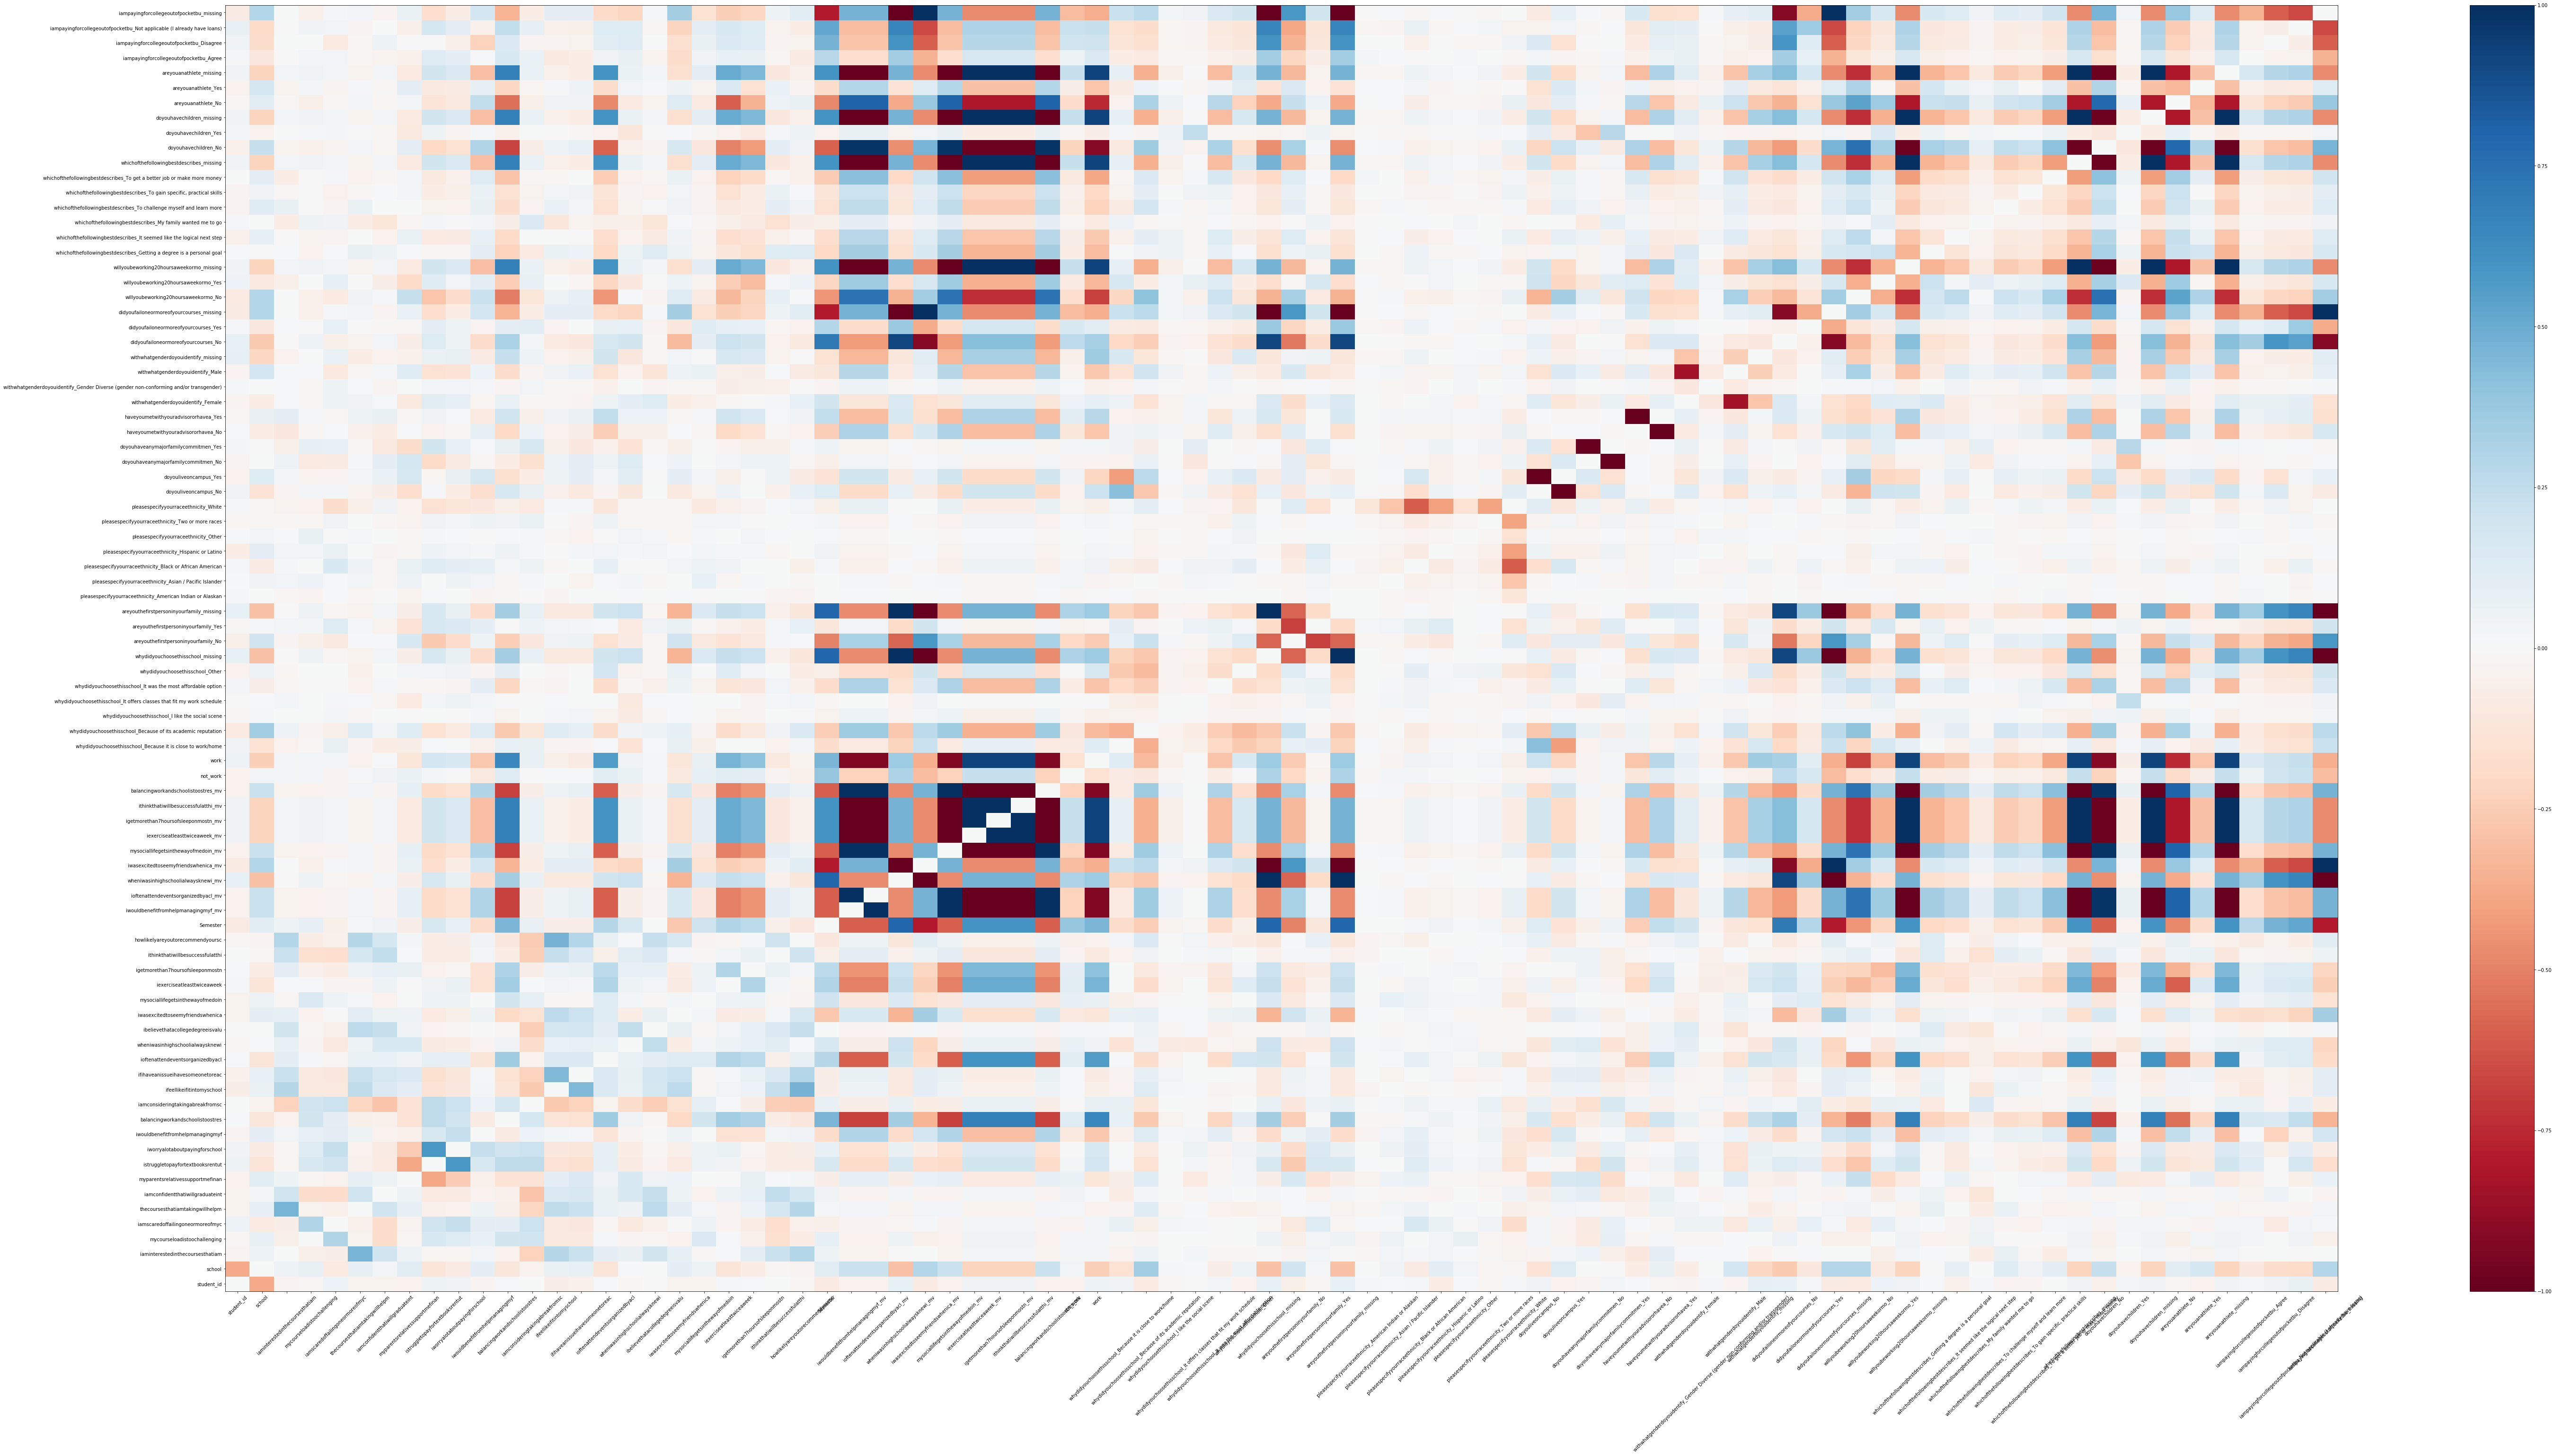

In [53]:
%matplotlib inline
import importlib
plotCorr(data, 'dropout', 100, 50)

In [80]:
# regular test, train, split (comment out everything underneath up to LR, Bernouilli, SVC, RF)
from sklearn.model_selection import train_test_split
X=data.drop("dropout",axis=1)
Y= data["dropout"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.8)

In [63]:
# build training, testing set
id_rand =np.random.permutation(data.shape[0])
train_id = id_rand[:int(data.shape[0]*0.8)]
test_id=id_rand[int(data.shape[0]*0.8):]
train_df,test_df = data.iloc[train_id,:], data.iloc[test_id,:]

In [64]:
# sampling prep
count_class_0, count_class_1 = train_df.dropout.value_counts()
df_class_0 = train_df[train_df['dropout'] == 0]
df_class_1 = train_df[train_df['dropout'] == 1]

In [60]:
# oversampling (comment out undersampling)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [65]:
# undersampling (comment out oversampling)
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [66]:
# train,test,split
X_train = df_train_over.drop("dropout",axis=1)
Y_train=df_train_over['dropout']
X_test=test_df.drop("dropout",axis=1)
Y_test=test_df['dropout']

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


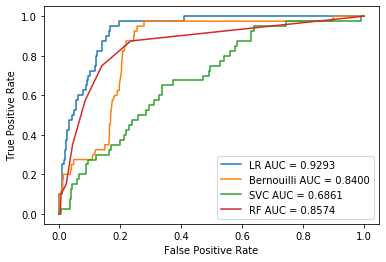

,Non Dropout,Dropout
0,525,3
1,36,4


In [81]:
# LR, Bernouilli, SVC, RF
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)
y_pred=lr_classifier.predict(X_test)
mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
lr_pred_proba=lr_classifier.predict_proba(X_test)
lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)


from sklearn.naive_bayes import BernoulliNB
b_classifier = BernoulliNB()
b_classifier.fit(X_train,Y_train)
y_pred=b_classifier.predict(X_test)
mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
b_pred_proba=b_classifier.predict_proba(X_test)
b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
b_auc = metrics.auc(b_fpr, b_tpr)
plt.plot(b_fpr, b_tpr, label = 'Bernouilli AUC = %0.4f' %b_auc)

from sklearn.svm import SVC
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train,Y_train)
y_pred=svc_classifier.predict(X_test)
mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
svc_pred_proba=svc_classifier.predict_proba(X_test)
svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
svc_auc = metrics.auc(svc_fpr, svc_tpr)
plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
clf_pred_proba=clf.predict_proba(X_test)
clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
clf_auc = metrics.auc(clf_fpr, clf_tpr)
plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)

plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

mat_rf

In [68]:
# Random Forest: shuffle, cross validation, undersampling


from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


def xValRF(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        clf = RandomForestClassifier()
        clf.fit(X_train,Y_train)
        y_pred=clf.predict(X_test)
        mat_rf=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        clf_pred_proba=clf.predict_proba(X_test)
        clf_fpr, clf_tpr, clf_threshold = metrics.roc_curve(Y_test, clf_pred_proba[:,1])
        clf_auc = metrics.auc(clf_fpr, clf_tpr)
        plt.plot(clf_fpr, clf_tpr, label = 'RF AUC = %0.4f' %clf_auc)
        aucs.append(clf_auc)
        print(mat_rf)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

In [69]:
# Support Vector Machine: shuffle, cross validation, undersampling


from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold


def xValSVC(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        svc_classifier = SVC(probability=True)
        svc_classifier.fit(X_train,Y_train)
        y_pred=svc_classifier.predict(X_test)
        mat_svc=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        svc_pred_proba=svc_classifier.predict_proba(X_test)
        svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(Y_test, svc_pred_proba[:,1])
        svc_auc = metrics.auc(svc_fpr, svc_tpr)
        plt.plot(svc_fpr, svc_tpr, label = 'SVC AUC = %0.4f' %svc_auc)
        aucs.append(svc_auc)
        print(mat_svc)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

In [70]:
# Naive Bayes: shuffle, cross validation, undersampling

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold


def xValB(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        
        b_classifier = BernoulliNB()
        b_classifier.fit(X_train,Y_train)
        y_pred=b_classifier.predict(X_test)
        mat_b=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        b_pred_proba=b_classifier.predict_proba(X_test)
        b_fpr, b_tpr, b_threshold = metrics.roc_curve(Y_test, b_pred_proba[:,1])
        b_auc = metrics.auc(b_fpr, b_tpr)
        plt.plot(b_fpr, b_tpr, label = 'Bernouilli AUC = %0.4f' %b_auc)
        aucs.append(b_auc)
        print(mat_b)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

In [71]:
# Logistic regression: shuffle, cross validation, undersampling
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold


def xValLR(dataset,k):
    kf = KFold(n_splits=k)
    aucs=[]
    data_new=dataset.sample(frac=1)
    data_new.reset_index()
    for train_index, test_index in kf.split(data_new):
        train_df = data_new.iloc[train_index]
        test_df=data_new.iloc[test_index]
        
        count_class_0, count_class_1 = train_df.dropout.value_counts()
        df_class_0 = train_df[train_df['dropout'] == 0]
        df_class_1 = train_df[train_df['dropout'] == 1]
        df_class_0_under = df_class_0.sample(count_class_1)
        df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
        
        X_train = df_train_over.drop("dropout",axis=1)
        Y_train= df_train_over['dropout']
        X_test= test_df.drop("dropout",axis=1)
        Y_test=test_df['dropout']
        lr_classifier = LogisticRegression()
        lr_classifier.fit(X_train,Y_train)
        y_pred=lr_classifier.predict(X_test)
        mat_lr=pd.DataFrame(confusion_matrix(Y_test, y_pred),columns=["Non Dropout", "Dropout"])
        lr_pred_proba=lr_classifier.predict_proba(X_test)
        lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve(Y_test, lr_pred_proba[:,1])
        lr_auc = metrics.auc(lr_fpr, lr_tpr)
        plt.plot(lr_fpr, lr_tpr, label = 'LR AUC = %0.4f' %lr_auc)
        aucs.append(lr_auc)
        print(mat_lr)
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return aucs

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


   Non Dropout  Dropout
0          527        1
1            6       34
   Non Dropout  Dropout
0          526        1
1            2       39
   Non Dropout  Dropout
0          535        2
1            4       27


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


   Non Dropout  Dropout
0          535        3
1            5       24
   Non Dropout  Dropout
0          528        0
1            6       33


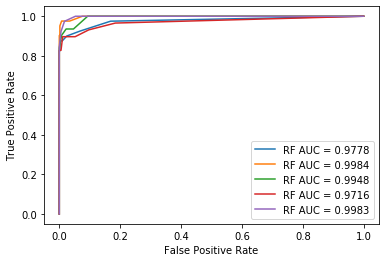

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


   Non Dropout  Dropout
0          534        1
1            6       27


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


   Non Dropout  Dropout
0          530        1
1            8       29


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


   Non Dropout  Dropout
0          533        1
1            5       29


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


   Non Dropout  Dropout
0          532        2
1            3       30


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


   Non Dropout  Dropout
0          523        1
1            8       35


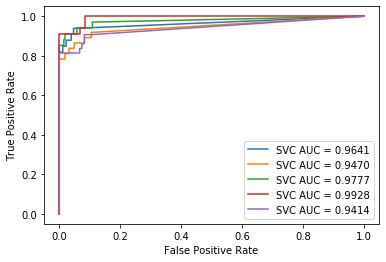

   Non Dropout  Dropout
0          320      205
1            2       41
   Non Dropout  Dropout
0          325      205
1            1       37
   Non Dropout  Dropout
0          337      194
1            1       36
   Non Dropout  Dropout
0          331      205
1            0       31
   Non Dropout  Dropout
0          326      210
1            1       30


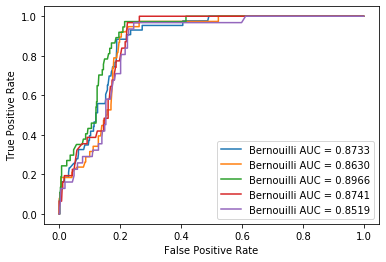

/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


   Non Dropout  Dropout
0          441       93
1            2       32
   Non Dropout  Dropout
0          433       95
1            2       38


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


   Non Dropout  Dropout
0          423      104
1            3       38
   Non Dropout  Dropout
0          442       90
1            1       34


/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/camilletaltas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


   Non Dropout  Dropout
0          464       73
1            1       29


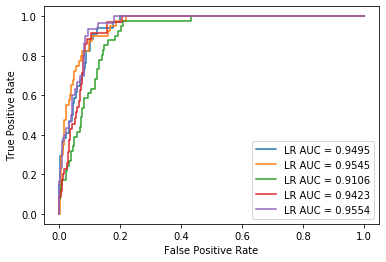

In [76]:
# Run each classification with cross validation
aucs_rf=xValRF(data, 5)
aucs_svc=xValSVC(data,5)
aucs_b=xValB(data,5)
aucs_lr=xValLR(data, 5)

In [77]:
# Mean of each classifier for each fold of cross validation
print(np.mean(aucs_rf),np.mean(aucs_svc),np.mean(aucs_b),np.mean(aucs_lr))

0.9881846970776721 0.9646072964968075 0.8717886365525811 0.9424642114186008


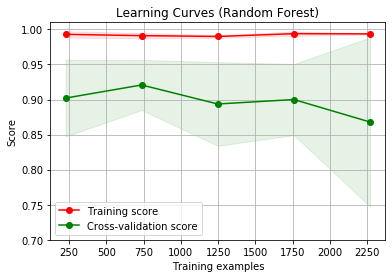

In [82]:
# Learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = data.drop("dropout",axis=1),data["dropout"]
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, data.drop("dropout",axis=1),data["dropout"], ylim=(0.7, 1.01), cv=5, n_jobs=4)


plt.show()

In [ ]:
dropout_id=data["student_id"][data["dropout"]==1]
idd= data["student_id"][(data["dropout"]==0)&(data["student_id"].isin(dropout_id))]
data["Semester"][(data["student_id"].isin(idd))&(data["dropout"]==1)].value_counts()
# data["Semester"][(data["dropout"]==0)&(data["student_id"].isin(dropout_id))].value_counts()
# repeat_id = data["student_id"][(data["dropout"]==0)&(data["Year"]=="2018")&(data["Semester"]==0)]
# start = data[(data["student_id"].isin(repeat_id))&(data["Year"]=="2019")&(data["Semester"]==0)]
# # new_data=data[(data["student_id"].isin(repeat_id))]
# start["dropout"].value_counts()
# dropout_id
# data[["Year","Semester","dropout"]][data["student_id"]==10.0]
# data["Semester"][data["dropout"]==1].value_counts()

# Students dropout in Fall 2018 and non dropout in Spring 2019